# Exploring the <code>chess</code> Library

In [5]:
import chess

In [6]:
board = chess.Board()

In [7]:
board.san(chess.Move(chess.E2, chess.E4))

'e4'

In [8]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [9]:
board.push_san("Nf3")

Move.from_uci('g1f3')

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R


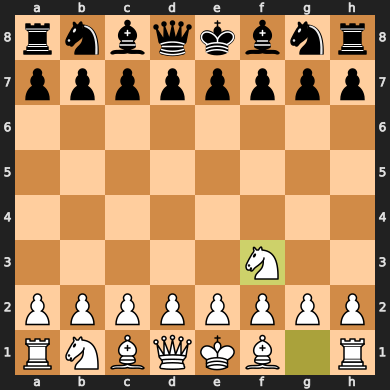

In [10]:
print(board)
board

In [11]:
board.move_stack

[Move.from_uci('g1f3')]

In [12]:
__repr__ = board.__repr__()

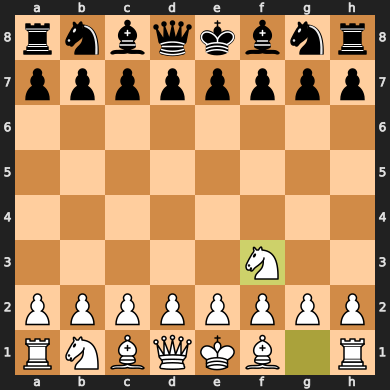

In [13]:
display(board)

In [15]:
board.push(chess.Move(chess.E2, chess.E1))

AssertionError: push() expects move to be pseudo-legal, but got e2e1 in rnbqkbnr/pppppppp/8/8/8/5N2/PPPP1PPP/RNBQpB1R

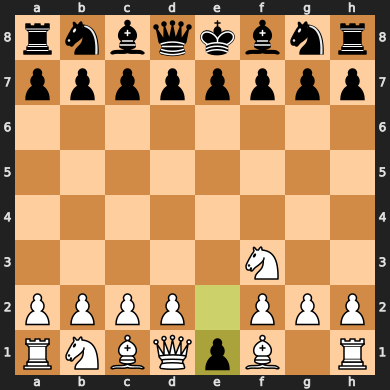

In [16]:
board

In [17]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P . P P P
R N B Q p B . R


In [19]:
board = chess.Board()
move = chess.Move.from_uci("e2e1")
move = move.uci()
board.push_uci(move)

IllegalMoveError: illegal uci: 'e2e1' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1

In [21]:
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

ValueError: expected position part of fen, got multiple parts: '4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1'

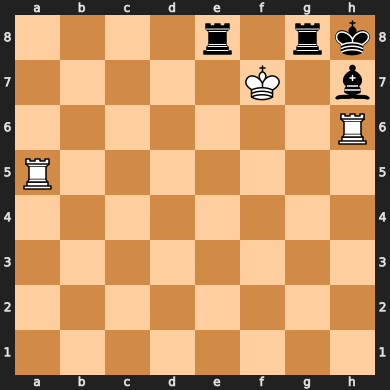

In [24]:
fen = '4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1'
chess.Board(fen)

In [33]:
fen = '4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1'
board = chess.Board(fen)
board.piece_map()
for square in board.piece_map():
    print(square, board.piece_map()[square])

63 k
62 r
60 r
55 b
53 K
47 R
32 R


In [78]:
board = chess.Board(fen)

def alpha_beta_pruning(curr, alpha, beta, depth, max_player=True):
    if curr.is_checkmate():
        if curr.turn == max_player:
            return (1000000, list())
        else:
            return (-1000000, list())
    if curr.is_stalemate():
        return 0, []
    if depth == 0:
        map = curr.piece_map()
        ref = {'p': 1, 'n': 3, 'b': 3, 'r': 5, 'q': 9, 'k': 100}
        count = dict()
        pieces = ['k', 'q', 'r', 'b', 'n', 'p']
        for piece in pieces:
            count[piece] = 0
            count[piece.upper()] = 0
        score = 0
        for key in map:
            count[str(map[key])] += 1
        for piece in pieces:
            score += (count[piece.upper()] - count[piece]) * ref[piece]
        return (score, list())
    # if curr.fen() == '4rr1k/7b/5K1R/R7/8/8/8/8 w - - 2 2':
    #     print('here')
    if max_player:
        max_eval = -1000000
        best_move = []
        for move in curr.legal_moves:
            new = curr.copy()
            new.push(move)
            eval, cmove = alpha_beta_pruning(new, alpha, beta, depth - 1, False)
            # print(new.fen(), eval, cmove, depth, alpha, beta)
            max_eval = max(max_eval, eval)
            if max_eval == eval:
                best_move = [move, ] + cmove 
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval, best_move
    else:
        min_eval = 1000000
        best_move = []
        for move in curr.legal_moves:
            new = curr.copy()
            new.push(move)
            eval, cmove = alpha_beta_pruning(new, alpha, beta, depth - 1, True)
            # print(new.fen(), eval, cmove, depth, alpha, beta)
            min_eval = min(min_eval, eval)
            if min_eval == eval:
                # print(cmove)
                best_move = [move, ] + cmove
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval, best_move

In [103]:
board = chess.Board(fen)
result = alpha_beta_pruning(board, -1000000, 1000000, 3, True)
for move in result[1]:
    print(board.san(move), end=' ')
    board.push(move)

Rxh7+ Kxh7 Rh5# 

In [104]:
import requests
url = 'https://wtharvey.com/m8n2a.html'
response = requests.get(url)

In [105]:
response.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\r\n<html><head> \r\n<!-- Global site tag (gtag.js) - Google Analytics -->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-2614779-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-2614779-1\');\r\n</script>\r\n<title>Mate in 2 Puzzles \'Section A\'</title>\r\n<meta name="kwrd" content="chess puzzles, strategy, tactics, free game, grandmaster"></head><body><center>\r\n\r\n<h2>See 2 moves ahead - Our \'mate in 2\' volume</h2>\r\n<a href="https://www.amazon.com/dp/1505487447" target="blank"><img src="m8n2Bk.jpg" width="140" height="180" border="0"></a>\r\n<br><br>\r\n\r\n<h3>Here are some \'mate in 2\' puzzles.<br> The color disk on the diagram indicates who moves first.</h3>\r\nSolutions are between the brackets under each puzzle.<br>Drag your cursor from one bracket to th

In [116]:
import re
puzzles = dict()
for line in response.text.split('\n'):
    if re.search(r'</a><br>.+<br>', line):
        line = line.split('<br>')
        if 'Black' in line[1]:
            line.pop(1)
        print(line)
        puzzles[line[1]] = line[2].split('white>')[1].split('<')[0]

['a) <img src="m8n2aaa.png"></a>', '4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1', '[ <font color=white>Rxh7+ Kxh7 Rh5#</font> ]', '', '\r']
['b) <img src="m8n2aab.png"></a>', '8/1r6/8/3R4/k7/p1K5/4r3/R7 w - - 0 1', '[ <font color=white>Rxa3+ Kxa3 Ra5#</font> ]', '', '\r']
['c) <img src="m8n2aac.png"></a>', '6k1/8/6K1/8/8/3r4/4r3/5R1R w - - 0 1', '[ <font color=white>Rh8+ Kxh8 Rf8#</font> ]', '', '\r']
['d) <img src="m8n2aad.png"></a>', '2rkr3/2ppp3/2n1n3/R2R4/8/8/3K4/8 w - - 0 1', '[ <font color=white>Rxd7+ Kxd7 Rd5#</font> ]', '', '\r']
['e) <img src="m8n2aae.png"></a>', '4rkr1/1R1R4/4bK2/8/8/8/8/8 w - - 0 1', '[ <font color=white>Rf7+ Bxf7 Rxf7#</font> ]', '', '\r']
['a) <img src="m8n2aba.png"></a>', '5K1k/6pp/7R/8/8/8/8/6R1 w - - 0 1', '[ <font color=white>Rgg6 gxh6 Rg8#</font> ]', '', '\r']
['b) <img src="m8n2abb.png"></a>', '2k5/1q4b1/3K4/8/7R/8/7R/8 w - - 0 1', '[ <font color=white>Rh8+ Bxh8 Rxh8#</font> ]', '', '\r']
['c) <img src="m8n2abc.png"></a>', '8/8/q5b1/7k/5Kp1/1R1R4/8/8 w - - 0 

In [117]:
puzzles

{'4r1rk/5K1b/7R/R7/8/8/8/8 w - - 0 1': 'Rxh7+ Kxh7 Rh5#',
 '8/1r6/8/3R4/k7/p1K5/4r3/R7 w - - 0 1': 'Rxa3+ Kxa3 Ra5#',
 '6k1/8/6K1/8/8/3r4/4r3/5R1R w - - 0 1': 'Rh8+ Kxh8 Rf8#',
 '2rkr3/2ppp3/2n1n3/R2R4/8/8/3K4/8 w - - 0 1': 'Rxd7+ Kxd7 Rd5#',
 '4rkr1/1R1R4/4bK2/8/8/8/8/8 w - - 0 1': 'Rf7+ Bxf7 Rxf7#',
 '5K1k/6pp/7R/8/8/8/8/6R1 w - - 0 1': 'Rgg6 gxh6 Rg8#',
 '2k5/1q4b1/3K4/8/7R/8/7R/8 w - - 0 1': 'Rh8+ Bxh8 Rxh8#',
 '8/8/q5b1/7k/5Kp1/1R1R4/8/8 w - - 0 1': 'Rh3+ gxh3 Rxh3#',
 'k7/3b4/1K6/8/8/5q2/2R1R3/8 w - - 0 1': 'Re8+ Bxe8 Rc8#',
 '8/1R1R4/8/p7/k1K5/r5r1/8/8 w - - 0 1': 'Rb4+ axb4 Ra7#',
 'kr6/1p6/8/1p5R/6R1/8/1r6/5K2 w - - 0 1': 'Ra4+ bxa4 Ra5#',
 '6R1/8/8/7p/5K1k/r6r/8/6R1 w - - 0 1': 'R1g4+ hxg4 Rh8#',
 '4R3/8/5K2/7p/R5pk/5npr/8/8 w - - 0 1': 'Rxg4+ if hxg4 Rh8# or if Kxg4 Re4#',
 'kb6/p4q2/2K5/8/8/8/8/1R1R4 w - - 0 1': 'Rxb8+ Kxb8 Rd8#',
 '8/6p1/6rk/6np/R6R/6K1/8/8 w - - 0 1': 'Rxh5+ Kxh5 Rh4#',
 'kn1R4/ppp5/2q5/8/8/8/8/3RK3 w - - 0 1': 'Rxb8+ Kxb8 Rd8#',
 '1kb4R/1npp4/8/8/8/8/8/R

In [126]:
from tqdm import tqdm
correct = 0
incorrect = 0
for puzzle in puzzles:
    board = chess.Board(puzzle)
    result = alpha_beta_pruning(board, -1000000, 1000000, 3, True)
    answer = ''
    for move in result[1]:
        answer += board.san(move) + ' '
        board.push(move)
    answer = answer.strip()
    if answer.strip() == puzzles[puzzle]:
        # print('Correct', answer)
        correct += 1
    else:
        try:
            if (answer.split(' ')[-1] == puzzles[puzzle].split(' ')[-1]) and (answer.split(' ')[0] == puzzles[puzzle].split(' ')[0]):
                # print('Correct', answer, puzzles[puzzle])
                correct += 1
            else:
                print('Incorrect', answer, puzzles[puzzle])
                incorrect += 1
        except:
            print('Incorrect', answer, puzzles[puzzle])
            incorrect += 1
print(correct, incorrect)

Incorrect Rh8+ Bf8+ Rxf8# Rh8+ Bxh8 Rxh8#
Incorrect Re8+ Bc8 Rexc8# Re8+ Bxe8 Rc8#
Incorrect Rxg4+ hxg4 Rh8# Rxg4+ if hxg4 Rh8# or if Kxg4 Re4#
Incorrect f7 g5 f8=Q# f7 w/f8/Q#
Incorrect g7+ Nxg7 f8=Q# g7+ Nxg7 f8/Q# (or f8/R#) 
Incorrect c7 a5 c8=Q# c7 if dxe5 c8/Q# (or c8/R#)
Incorrect e8=Q h5 Qh8# e8/Q+ Nxe8 g8/Q#
Incorrect e7 Rxa7 e8=Q# e7 Rxa7 e8/Q# (or e8/R#)
Incorrect Kd6 Rxf7 b8=Q# Kd6 Rxf7 b8/Q# (or b8/R#)
Incorrect c7 a2 c8=Q# c7 exf3 c8/Q# (or c8/B#)
Incorrect h8=N a1=N Ng6# h8/N a1/Q Ng6#
Incorrect Bd4+ Bxd4 Ra8# Bd4+ Bxd4 Ra8+
Incorrect Rh6 Nf6 Bxf6# Rh6 Nxh6 Bf6#
Incorrect Kf7+ Qxb2 Rg8# Kf7+ if Qxb2 Rg8# or if Bb7 Bxg7#
Incorrect Ba6 g1=N Bxb7# Ba6 if g1/Q Bxb7# or if Bxa6 Rb8#
Incorrect Rh3 g3 Bf7# Rh3 w/Bf7#
Incorrect Re8+ Bc8 Rxc8# Re8+ Bxe8 Qc8#
Incorrect Rh8+ Qxh8 b8=Q# Rh8+ Qh8 b8/Q#
Incorrect Qxa6+ bxa6 Bc6# Qxa6+ if bxa6 Bc6# or if Ba7 Qxb7#
Incorrect Kc8 Nb4 Nc7# Kc8 w/Nc7# or Nxc7#
Incorrect f7+ Rxc3 f8=Q# f7+ if Rxc3 f8/Q# or f8/R# or if Rg7+ Bxg7#
Incorrect c